# Name - Hitanshu Gupta
## Reg. No. - 12018790
### Roll No. - RKM035B68
### Section - KM035

## Project Topic  - Estimation of obesity levels based on eating habits and physical condition

# Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv",na_values='?')

In [3]:
# check for missing values
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### Outliers

For non-categorical variables, we need to check if there is any outliers. There 3 concerned variables are Age, Height and Weight.
For non-categorical variables, we need to check if there is any outliers. There 3 concerned variables are Age, Height and Weight.

<AxesSubplot:xlabel='Height'>

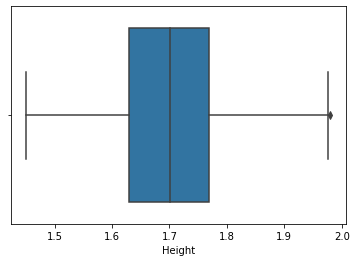

In [5]:
sns.boxplot(x=df['Height'])

<AxesSubplot:xlabel='Weight'>

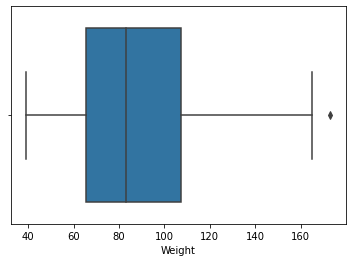

In [6]:
sns.boxplot(x=df['Weight'])

In [7]:
df_categorized = df.copy()

In [8]:
q1, q2 = df_categorized["Height"].quantile(q=0.25), df_categorized["Height"].quantile(q=0.75)
q3, q4 = df_categorized["Weight"].quantile(q=0.25), df_categorized["Weight"].quantile(q=0.75)

IQR1, IQR2 = q2-q1, q4-q3

#Height selection
df_categorized = df_categorized[df_categorized["Height"] >  q1 - 1.5*IQR1]
df_categorized = df_categorized[df_categorized["Height"] <  q2 + 1.5*IQR1]

#Weight selection
df_categorized = df_categorized[df_categorized["Weight"] >  q3 - 1.5*IQR2]
df_categorized = df_categorized[df_categorized["Weight"] <  q4 + 1.5*IQR2]

df_categorized.shape

(2109, 17)

In [9]:
df.shape

(2111, 17)

Only 3 lines were deleted.

<AxesSubplot:xlabel='Weight'>

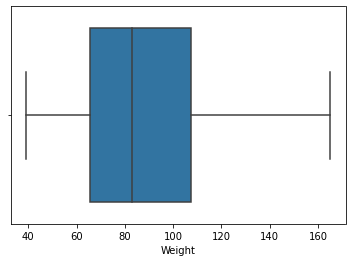

In [10]:
sns.boxplot(x=df_categorized['Weight'])

<AxesSubplot:xlabel='Height'>

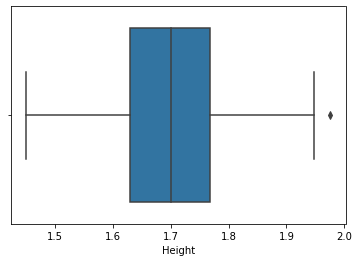

In [11]:
sns.boxplot(x=df_categorized['Height'])

In [12]:
df_categorized.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [13]:
c=['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in c:
    df_categorized[i]=le.fit_transform(df_categorized[i])

In [14]:
df_categorized.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [15]:
df_features = df_categorized.drop(columns = 'NObeyesdad')

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_features)
df_scaled = pd.DataFrame(scaler.transform(df_features))
df_scaled['NObesity'] = df['NObeyesdad']
df_scaled.columns = df.columns.to_list()
df_scaled.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.010966,-0.522851,-0.875432,-0.862561,0.472565,-2.75829,-0.784838,0.404376,0.29881,-0.145971,-0.012314,-0.218380,-1.187312,0.562347,1.418188,0.503636,Normal_Weight
1,-1.010966,-0.522851,-1.950036,-1.168884,0.472565,-2.75829,1.088434,0.404376,0.29881,6.850680,1.619759,4.579165,2.339939,-1.079742,-0.521474,0.503636,Normal_Weight
2,0.989153,-0.207656,1.058855,-0.364787,0.472565,-2.75829,-0.784838,0.404376,0.29881,-0.145971,-0.012314,-0.218380,1.164189,0.562347,-2.461135,0.503636,Normal_Weight
3,0.989153,0.422733,1.058855,0.018116,-2.116110,-2.75829,1.088434,0.404376,0.29881,-0.145971,-0.012314,-0.218380,1.164189,-1.079742,-2.461135,1.296299,Overweight_Level_I
4,0.989153,-0.365253,0.843934,0.125329,-2.116110,-2.75829,-0.784838,-2.165781,0.29881,-0.145971,-0.012314,-0.218380,-1.187312,-1.079742,-0.521474,0.503636,Overweight_Level_II


In [17]:
df_scaled_features = df_scaled.drop(columns = 'NObeyesdad')


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(df_scaled_features, df_categorized['NObeyesdad'], test_size=0.33)

In [19]:
print(df_categorized['NObeyesdad'])

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2109, dtype: int32


In [20]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1413, 16) (696, 16) (1413,) (696,)


In [21]:
perf=[]

# Implementing Perceptron

In [68]:
from sklearn.linear_model import Perceptron
model = Perceptron()

In [69]:
model.fit(X_train,Y_train)

Perceptron()

In [70]:
pred_train_pr=model.predict(X_train)
pred_test_pr=model.predict(X_test)
print("model summary : ")
print(classification_report(Y_test, pred_test_pr))
print("Accuracy for training ",accuracy_score(pred_train_pr,Y_train))
print("Accuracy for testing ",accuracy_score(pred_test_pr,Y_test))
score1 = accuracy_score(pred_test_pr, Y_test)
perf.append([score1,"Perceptron"])

model summary : 
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       100
           1       0.35      0.34      0.34       104
           2       0.48      0.50      0.49       120
           3       0.79      0.80      0.79       104
           4       0.98      1.00      0.99       100
           5       0.24      0.29      0.26        86
           6       0.36      0.34      0.35        82

    accuracy                           0.57       696
   macro avg       0.57      0.56      0.57       696
weighted avg       0.58      0.57      0.58       696

Accuracy for training  0.6015569709837226
Accuracy for testing  0.5718390804597702


## Implementing Logistic Regression

In [25]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)
LR_Pred_test = logisticRegr.predict(X_test)
LR_pred_train = logisticRegr.predict(X_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print("model summary : ")
print(classification_report(Y_test, LR_Pred_test))
print("Accuracy for training ",accuracy_score(LR_pred_train,Y_train))
print("Accuracy for testing ",accuracy_score(LR_Pred_test,Y_test))
score2 = accuracy_score(LR_Pred_test, Y_test)
perf.append([score2,"Logistic regression"])

model summary : 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       100
           1       0.87      0.56      0.68       104
           2       0.95      0.86      0.90       120
           3       0.94      0.98      0.96       104
           4       0.96      1.00      0.98       100
           5       0.67      0.83      0.74        86
           6       0.74      0.78      0.76        82

    accuracy                           0.86       696
   macro avg       0.85      0.85      0.85       696
weighted avg       0.86      0.86      0.85       696

Accuracy for training  0.8931351733899504
Accuracy for testing  0.8563218390804598


## Implementing SVM

In [27]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, Y_train)
pred_svm_test = clf.predict(X_test)
pred_svm_train = clf.predict(X_train)

In [28]:
print("model summary for SVM : ")
print(classification_report(Y_test, pred_svm_test))
print("Accuracy for training ",accuracy_score(pred_svm_train,Y_train))
print("Accuracy for testing ",accuracy_score(pred_svm_test,Y_test))
score3 = accuracy_score(pred_svm_test, Y_test)
perf.append([score3,"SVM"])

model summary for SVM : 
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       100
           1       0.71      0.67      0.69       104
           2       0.96      0.90      0.93       120
           3       0.95      0.97      0.96       104
           4       1.00      1.00      1.00       100
           5       0.72      0.85      0.78        86
           6       0.89      0.85      0.87        82

    accuracy                           0.88       696
   macro avg       0.88      0.88      0.88       696
weighted avg       0.88      0.88      0.88       696

Accuracy for training  0.9419674451521586
Accuracy for testing  0.8807471264367817


## Random Forest

In [29]:
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X_train, Y_train)
rf_pred_test=rf.predict(X_test)
rf_pred_train=rf.predict(X_train)

In [30]:
print("matrice de confusion")
print(confusion_matrix(Y_test,rf_pred_test))
print("model summary for Random Forest : ")
print(classification_report(Y_test, rf_pred_test))
print("Accuracy for training ",accuracy_score(rf_pred_train,Y_train))
print("Accuracy for testing ",accuracy_score(rf_pred_test,Y_test))
score4 = accuracy_score(rf_pred_test, Y_test)
perf.append([score4,"Random Forest"])

matrice de confusion
[[ 95   5   0   0   0   0   0]
 [  2 101   0   0   0   1   0]
 [  0   0 114   0   0   0   6]
 [  0   0   1 102   1   0   0]
 [  0   0   0   0 100   0   0]
 [  0   7   0   0   0  76   3]
 [  0   1   0   0   0   2  79]]
model summary for Random Forest : 
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       100
           1       0.89      0.97      0.93       104
           2       0.99      0.95      0.97       120
           3       1.00      0.98      0.99       104
           4       0.99      1.00      1.00       100
           5       0.96      0.88      0.92        86
           6       0.90      0.96      0.93        82

    accuracy                           0.96       696
   macro avg       0.96      0.96      0.96       696
weighted avg       0.96      0.96      0.96       696

Accuracy for training  1.0
Accuracy for testing  0.9583333333333334


## Naive Bayes

In [34]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
pred_gnb_test = gnb.predict(X_test)
pred_gnb_train = gnb.predict(X_train)

In [35]:
print("matrice de confusion")
print(confusion_matrix(Y_test,pred_gnb_test))
print("model summary for Random Forest : ")
print(classification_report(Y_test, pred_gnb_test))
print("Accuracy for training ",accuracy_score(pred_gnb_train,Y_train))
print("Accuracy for testing ",accuracy_score(pred_gnb_test,Y_test))
score5 = accuracy_score(pred_gnb_test, Y_test)
perf.append([score5,"Naive Bayes"])

matrice de confusion
[[ 99   1   0   0   0   0   0]
 [ 87   5   3   2   0   3   4]
 [  0   1  52  60   1   3   3]
 [  0   1   2 101   0   0   0]
 [  0   0   0   0 100   0   0]
 [ 33   4  24  19   0   5   1]
 [ 15   3  15  39   0   2   8]]
model summary for Random Forest : 
              precision    recall  f1-score   support

           0       0.42      0.99      0.59       100
           1       0.33      0.05      0.08       104
           2       0.54      0.43      0.48       120
           3       0.46      0.97      0.62       104
           4       0.99      1.00      1.00       100
           5       0.38      0.06      0.10        86
           6       0.50      0.10      0.16        82

    accuracy                           0.53       696
   macro avg       0.52      0.51      0.43       696
weighted avg       0.52      0.53      0.45       696

Accuracy for training  0.5222929936305732
Accuracy for testing  0.5316091954022989


## Desicion Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
pred_tree_test = tree.predict(X_test)
pred_tree_train = tree.predict(X_train)

In [38]:
print("matrice de confusion")
print(confusion_matrix(Y_test,pred_tree_test))
print("model summary for Desicion Tree : ")
print(classification_report(Y_test, pred_tree_test))
print("Accuracy for training ",accuracy_score(pred_tree_train,Y_train))
print("Accuracy for testing ",accuracy_score(pred_tree_test,Y_test))
score6 = accuracy_score(pred_tree_test, Y_test)
perf.append([score6,"Desicion Tree"])

matrice de confusion
[[ 92   8   0   0   0   0   0]
 [  6  90   0   0   0   8   0]
 [  0   1 110   3   0   1   5]
 [  0   0   2 101   1   0   0]
 [  0   0   0   0 100   0   0]
 [  0   5   1   0   0  77   3]
 [  0   0   0   0   0   5  77]]
model summary for Desicion Tree : 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       100
           1       0.87      0.87      0.87       104
           2       0.97      0.92      0.94       120
           3       0.97      0.97      0.97       104
           4       0.99      1.00      1.00       100
           5       0.85      0.90      0.87        86
           6       0.91      0.94      0.92        82

    accuracy                           0.93       696
   macro avg       0.93      0.93      0.93       696
weighted avg       0.93      0.93      0.93       696

Accuracy for training  1.0
Accuracy for testing  0.9295977011494253


#### Ranking Before the Hyperparameter Tuning

### Ranking of the best prediction models

In [39]:
perf=sorted(perf, reverse = True)
for i in range(len(perf)):
    print(str(i+1)+"-" + str(perf[i][1])+" with an testing accuracy of : "+ str(round(perf[i][0]*100,2))+"%")

1-Random Forest with an testing accuracy of : 95.83%
2-Desicion Tree with an testing accuracy of : 92.96%
3-SVM with an testing accuracy of : 88.07%
4-Logistic regression with an testing accuracy of : 85.63%
5-Perceptron with an testing accuracy of : 57.18%
6-Naive Bayes with an testing accuracy of : 53.16%


## Implementing SVM model With Pipeline

In [40]:
perf_a = []

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [43]:
pipe1=Pipeline([('sc',StandardScaler()),('pca',PCA()),('svm',clf)])

In [44]:
pipe1.fit(X_train,Y_train)

Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()), ('svm', SVC())])

In [45]:
pipeline_train_prediction=pipe1.predict(X_train)

In [46]:
pipeline_test_prediction=pipe1.predict(X_test)

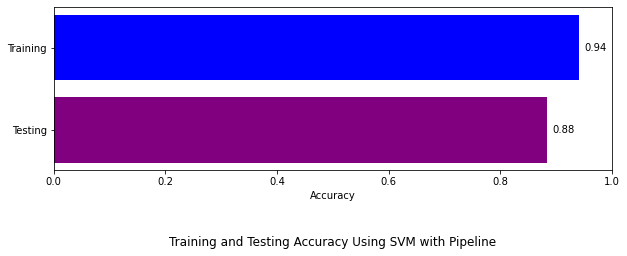

In [51]:
plt.figure(figsize=(10, 3))
plt.barh(y=["Testing","Training"], width=[accuracy_score(pipeline_test_prediction,Y_test), accuracy_score(pipeline_train_prediction,Y_train)], color=["purple", "blue"])
plt.xlim(0, 1)
plt.xlabel("Accuracy")
plt.text(accuracy_score(pipeline_train_prediction,Y_train)+0.01, 1, f"{accuracy_score(pipeline_train_prediction,Y_train):.2f}", va='center')
plt.text(accuracy_score(pipeline_test_prediction,Y_test)+0.01, 0, f"{accuracy_score(pipeline_test_prediction,Y_test):.2f}", va='center')
plt.title("Training and Testing Accuracy Using SVM with Pipeline",y=-0.5)
plt.show()

In [52]:
score7 = accuracy_score(pipeline_test_prediction, Y_test)
perf_a.append([score7,"Pipeline SVM"])

In [53]:
perf_a=sorted(perf_a, reverse = True)
for i in range(len(perf_a)):
    print(str(i+1)+"-" + str(perf_a[i][1])+" with an testing accuracy of : "+ str(round(perf_a[i][0]*100,2))+"%")

1-Pipeline SVM with an testing accuracy of : 88.36%


# HyperParameter Tuning for Perceptron

In [54]:
param_grid = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [100, 500, 1000],
    'eta0': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train,Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'alpha': 0.01, 'eta0': 0.001, 'max_iter': 100, 'penalty': 'l2'}
Best Score: 0.6312858682304588


## Hyperparameter tuning on svm

In [58]:
parameters = {'C':[4,2,3,5,6], "degree":[1,3,5,2,4],'gamma':[0.5,0.1,0.15,0.6,0.8,0.9],"kernel":["rbf","poly","sigmoid"]}
grid=GridSearchCV(clf,parameters,n_jobs=-1)
grid.fit(X_train,Y_train)
print(grid.best_score_,grid.best_estimator_)

0.9575320151367066 SVC(C=4, degree=1, gamma=0.8, kernel='poly')


In [61]:
clf2 = SVC(C=6, degree=1, gamma=0.9, kernel='poly')
clf2.fit(X_train, Y_train)
pred_svm2_test= clf2.predict(X_test)
pred_svm2_train = clf2.predict(X_train)

In [62]:
print("model summary for SVM after hp : ")
print(classification_report(Y_test, pred_svm2_test))
print("Accuracy for training ",accuracy_score(pred_svm2_train,Y_train))
print("Accuracy for testing ",accuracy_score(pred_svm2_test,Y_test))
score8 = accuracy_score(pred_svm2_test, Y_test)
perf_a.append([score8,"SVM_2"])

model summary for SVM after hp : 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       100
           1       0.99      0.87      0.92       104
           2       0.98      0.98      0.98       120
           3       0.99      0.98      0.99       104
           4       0.99      1.00      1.00       100
           5       0.93      0.93      0.93        86
           6       0.93      0.95      0.94        82

    accuracy                           0.96       696
   macro avg       0.96      0.96      0.96       696
weighted avg       0.96      0.96      0.96       696

Accuracy for training  0.9766454352441614
Accuracy for testing  0.9597701149425287


## HT FOR Desicion tree

In [71]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9412600556349148


In [73]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2)
tree2.fit(X_train, Y_train)
pred_tree2_test= tree2.predict(X_test)
pred_tree2_train = tree2.predict(X_train)

In [74]:
print("model summary for tree2 after hp : ")
print(classification_report(Y_test, pred_tree2_test))
print("Accuracy for training ",accuracy_score(pred_tree2_train,Y_train))
print("Accuracy for testing ",accuracy_score(pred_tree2_test,Y_test))
score9 = accuracy_score(pred_tree2_test, Y_test)
perf_a.append([score9,"tree2"])

model summary for tree2 after hp : 
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       100
           1       0.87      0.90      0.89       104
           2       0.98      0.96      0.97       120
           3       0.96      0.97      0.97       104
           4       0.99      1.00      1.00       100
           5       0.92      0.93      0.92        86
           6       0.96      0.95      0.96        82

    accuracy                           0.95       696
   macro avg       0.95      0.94      0.94       696
weighted avg       0.95      0.95      0.95       696

Accuracy for training  1.0
Accuracy for testing  0.9454022988505747


## HT For Random Forest

In [76]:
param_grid = {
    'n_estimators': [25, 50, 100, 150, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 100}
Best Score: 0.7990226298774529


In [87]:
rf2 = RandomForestClassifier(max_depth=6, max_features='sqrt', max_leaf_nodes=9, n_estimators=100)
rf2.fit(X_train, Y_train)
pred_rf2_test= rf2.predict(X_test)
pred_rf2_train = rf2.predict(X_train)

In [88]:
print("model summary for rf2 after hp : ")
print(classification_report(Y_test, pred_rf2_test))
print("Accuracy for training ",accuracy_score(pred_rf2_train,Y_train))
print("Accuracy for testing ",accuracy_score(pred_rf2_test,Y_test))
score10 = accuracy_score(pred_rf2_test, Y_test)
perf_a.append([score10,"rf2"])

model summary for rf2 after hp : 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       100
           1       0.73      0.62      0.67       104
           2       0.79      0.69      0.74       120
           3       0.83      0.97      0.90       104
           4       0.99      1.00      1.00       100
           5       0.70      0.66      0.68        86
           6       0.64      0.66      0.65        82

    accuracy                           0.79       696
   macro avg       0.79      0.79      0.79       696
weighted avg       0.79      0.79      0.79       696

Accuracy for training  0.8223637650389243
Accuracy for testing  0.7945402298850575
